In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("E:\\Marwan Gamal\\Projects ML\Diabetes Project\\diabetes_data.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### 1. Polyuria: is a condition where the body urinates more than usual and passes excessive or abnormally large amounts of urine each time you urinate. Frequent passage of large volumes of urine –more than 3 litres a day compared to the normal daily urine output in adults of about 1 to 2 litres. (Yes/No)

### 2. Polydipsia: is the term given to excessive thirst and is one of the initial symptoms of diabetes. It is also usually accompanied by temporary or prolonged dryness of the mouth. (Yes/No)

### 3. sudden weight loss: Is the leading risk factor for type 2 diabetes,insufficient insulin prevents the body from getting glucose from the blood into the body's cells to use as energy. When this occurs, the body starts burning fat and muscle for energy, causing a reduction in overall body weight. (Yes/No)

### 4. weakness:  Might result when the cells do not get enough glucose. Diabetes medications, such as insulin or metformin, help more of this sugar to move into the cells and prevent it from building to harmful levels in the blood. (Yes/No)

### 5. Polyphagia: is the medical term used to describe excessive hunger or increased appetite and is one of the 3 main signs of diabetes. (Yes/No)

### 6. Genital thrush: is a yeast infection (candida albicans) which tends to affect warm, moist areas of the body such as the mouth and certain areas of skin.Thrush is more common in people with diabetes as high sugar levels lead to better conditions for the yeast to grow. (Yes/No)

### 7. visual blurring: One of the common signs of diabetes mellitus, which refers to the loss of sharpness of vision and the inability to see fine details. (Yes/No)

### 8. Itching: It can be caused by a yeast infection, dry skin, or poor circulation. When poor circulation is the cause of itching, the itchiest areas may be the lower parts of the legs. (Yes/No)

### 9. Irritability: Changes in blood sugar level can affect a person's mood and mental status. When blood sugar returns to a normal range, these symptoms often resolve. Fluctuations in blood glucose can result in rapid mood changes, including low mood and irritability. (Yes/No)

### 10. delayed healing: People with uncontrolled diabetes may develop poor circulation. As circulation slows down, blood moves more slowly, which makes it more difficult for the body to deliver nutrients to wounds. As a result, the injuries heal slowly, or may not heal at all. (Yes/No)

### 11. muscle stiffness: lessened ability to move your joints, joint swelling, deformities, and a “pins and needles” sensation in the arms or legs. Some musculoskeletal problems are unique to diabetes. Others also affect people without diabetes. (Yes/No)

### 12. Alopecia: the immune system attacks the hair follicles, leading to patches of hair loss on the head and on other parts of the body. (Yes/No)

### 13. Obesity: is the leading risk factor for type 2 diabetes. (Yes/No)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

### check the null values

In [5]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1=df
exp=df1.iloc[:,1:]
for col in exp:
    if(df1[col].dtype == 'object'):
        df1.loc[:,col] = le.fit_transform(df1.loc[:,col])

In [7]:
df1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [8]:
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


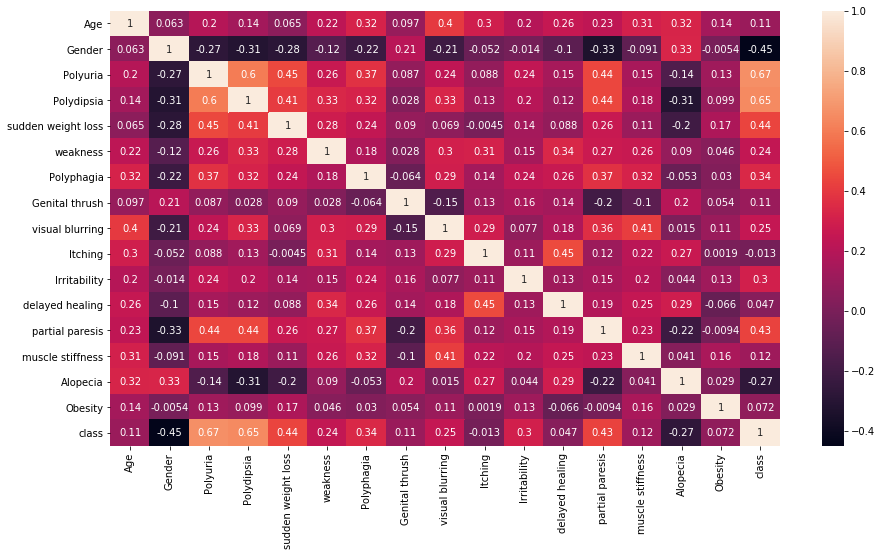

In [9]:
corr = df1.corr()
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(corr,annot=True);

### The variables Polyuria and Polydipsia are highly +ve correlated, Gender is -ve correlated 

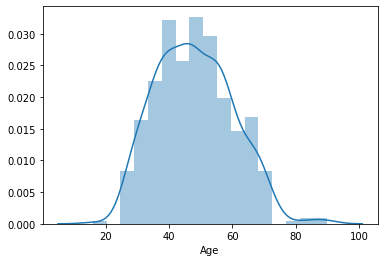

In [10]:
sns.distplot(df1['Age']);

In [11]:
young_ages=df[(df['Age']>=16)&(df['Age']<40)]
middle_ages=df[(df['Age']>=40)&(df['Age']<55)]
elderly_ages=df[(df['Age']>55)]
print('Young Ages is',len(young_ages))
print('Middle Ages is',len(middle_ages))
print('Elderly Ages is',len(elderly_ages))

Young Ages is 144
Middle Ages is 214
Elderly Ages is 140


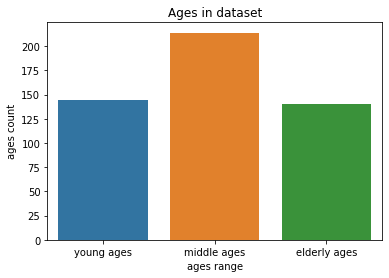

In [12]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.title('Ages in dataset')
plt.xlabel('ages range')
plt.ylabel('ages count');

In [13]:
df['Gender'].value_counts()

1    328
0    192
Name: Gender, dtype: int64

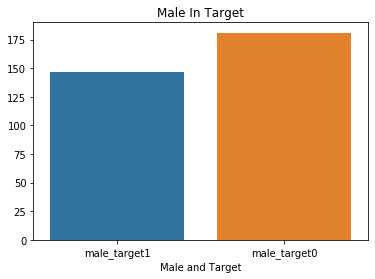

In [14]:
male_target1 =len(df[(df['Gender']==1) & (df['class']== 1)])
male_target0 =len(df[(df['Gender']==1) & (df['class']== 0)])
sns.barplot(x=['male_target1','male_target0'], y=[male_target1,male_target0])
plt.title('Male In Target')
plt.xlabel('Male and Target')
plt.show()

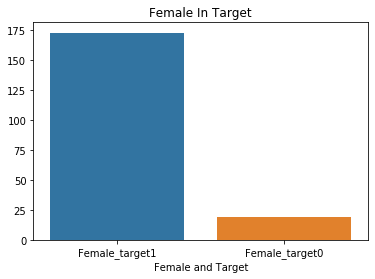

In [15]:
Female_target1 =len(df[(df['Gender']==0) & (df['class']== 1)])
Female_target0 =len(df[(df['Gender']==0) & (df['class']== 0)])
sns.barplot(x=['Female_target1','Female_target0'], y=[Female_target1,Female_target0])
plt.title('Female In Target')
plt.xlabel('Female and Target')
plt.show()

### female is more chance to diabetes disase

In [16]:
df['Polyuria'].value_counts()

0    262
1    258
Name: Polyuria, dtype: int64

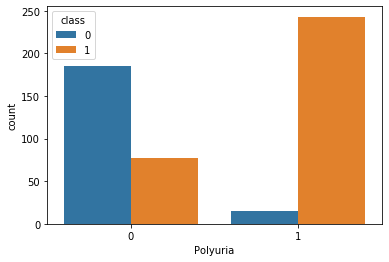

In [17]:
sns.countplot(x='Polyuria',hue='class',data=df)

### we have 'Polyuria' chance to  have diabets is high


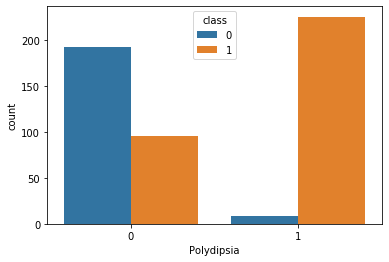

In [18]:
sns.countplot(x='Polydipsia',hue='class',data=df)

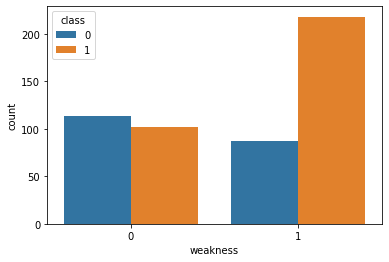

In [19]:
 sns.countplot(x='weakness',hue='class',data=df)

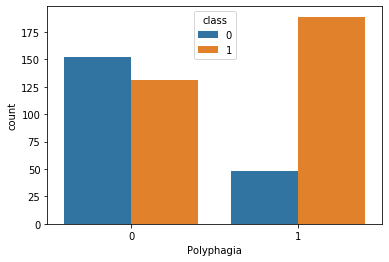

In [20]:
sns.countplot(x='Polyphagia',hue='class',data=df)

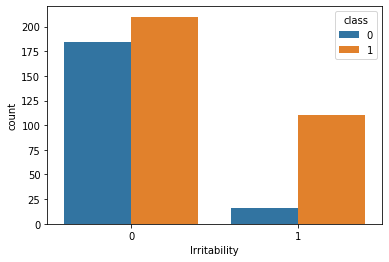

In [21]:
sns.countplot(x='Irritability',hue='class',data=df)

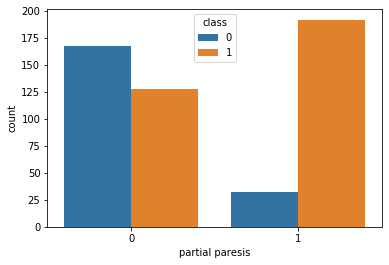

In [22]:
sns.countplot(x='partial paresis',hue='class',data=df)

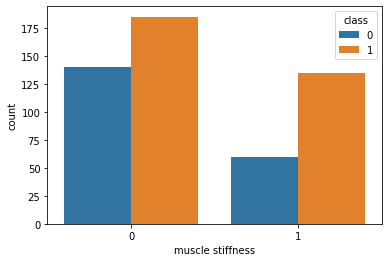

In [23]:
sns.countplot(x='muscle stiffness',hue='class',data=df)

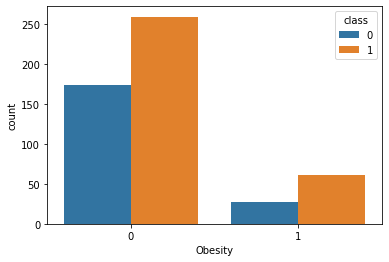

In [24]:
sns.countplot(x='Obesity',hue='class',data=df)

In [25]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
scaler =preprocessing.RobustScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [28]:
# make function to draw the plot ROC to easly
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def plot_roc_(fpr,tpr,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [29]:
Accuracies= {} # make dictionry to save all accuracies models
from sklearn.linear_model import LogisticRegression

# define model
lg = LogisticRegression()

# parameters
parameters=[{'penalty':['l1','l2'],'C':[0.1,0.4,0.5],'random_state':[0]}]

#define search
search = GridSearchCV(lg, parameters, scoring='accuracy', n_jobs=-1, )

# execute search
result = search.fit(x_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9206253585771659
Best Hyperparameters: {'C': 0.4, 'penalty': 'l2', 'random_state': 0}


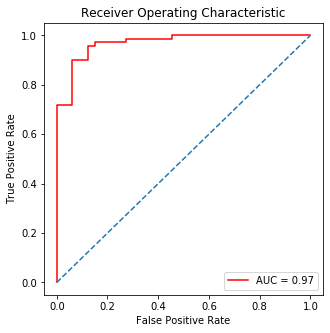

In [30]:
lr=LogisticRegression(C=0.4,penalty='l2',random_state=0)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_proba=lr.predict_proba(x_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr, tpr, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_(fpr,tpr,roc_auc)

Accuracy: 93.27%
Logistic TRAIN score with  0.9206730769230769
Logistic TEST score with  0.9326923076923077

[[29  4]
 [ 3 68]]


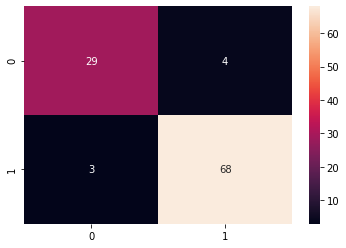

In [31]:
acc = accuracy_score(y_test, y_pred)*100
Accuracies['Logistic Regression'] = acc
print("Accuracy: {:.2f}%".format(acc))
print("Logistic TRAIN score with ",format(lr.score(x_train, y_train)))
print("Logistic TEST score with ",format(lr.score(x_test, y_test)))
print()
co=confusion_matrix(y_test,y_pred)
print(co)
sns.heatmap(co,annot=True)
plt.show()

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.94      0.96      0.95        71

    accuracy                           0.93       104
   macro avg       0.93      0.92      0.92       104
weighted avg       0.93      0.93      0.93       104



# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# define model
knn = KNeighborsClassifier()

# parameters
parameters=[{'n_neighbors':np.arange(2,33),'n_jobs':[2,6]}]

# define search
search = GridSearchCV(knn, parameters, scoring='accuracy')

# execute search
result = search.fit(x_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9447504302925989
Best Hyperparameters: {'n_jobs': 2, 'n_neighbors': 3}


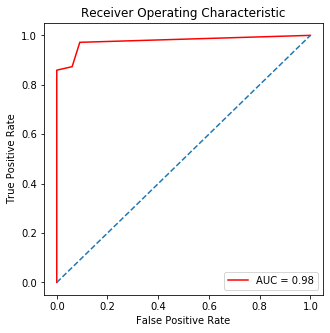

In [34]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=3)
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

y_proba=knn.predict_proba(x_test)
#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr, tpr, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_(fpr,tpr,roc_auc)

Accuracy: 89.42%
KNN TRAIN score with  0.9711538461538461
KNN TEST score with  0.8942307692307693

[[31  2]
 [ 9 62]]


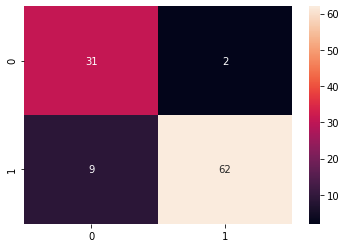

In [35]:
acc = accuracy_score(y_test, y_pred)*100
Accuracies['KNN'] = acc
print("Accuracy: {:.2f}%".format(acc))
print("KNN TRAIN score with ",format(knn.score(x_train, y_train)))
print("KNN TEST score with ",format(knn.score(x_test, y_test)))
print()

co=confusion_matrix(y_test,y_pred)
print(co)
sns.heatmap(co,annot=True)
plt.show()

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        33
           1       0.97      0.87      0.92        71

    accuracy                           0.89       104
   macro avg       0.87      0.91      0.88       104
weighted avg       0.91      0.89      0.90       104



# SVM

In [37]:
from sklearn.svm import SVC

# define model
svc =SVC()

# parameters
parameters = [{'kernel': ['linear'],'random_state': [2]}, {'kernel': ['rbf'],'gamma':[0.9,0.06,0.3],'random_state': [0],
        'C':[1,2,3,4,5,6],'degree':[2], 'probability':[True]}]

# define search
search = GridSearchCV(svc, parameters, scoring='accuracy')

# execute search
result = search.fit(x_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9734939759036145
Best Hyperparameters: {'C': 6, 'degree': 2, 'gamma': 0.9, 'kernel': 'rbf', 'probability': True, 'random_state': 0}


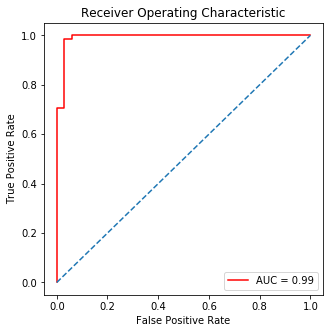

In [38]:
svc=SVC(C=6, degree=2, gamma=0.9, kernel='rbf',probability=True, random_state=0)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
y_proba=svc.predict_proba(x_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr, tpr, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_(fpr,tpr,roc_auc)

Accuracy: 97.12%
SVC TRAIN score with  0.9951923076923077
SVC TEST score with  0.9711538461538461

[[31  2]
 [ 1 70]]


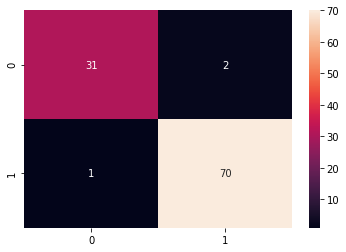

In [39]:
acc = accuracy_score(y_test, y_pred)*100
Accuracies['SVM'] = acc
print("Accuracy: {:.2f}%".format(acc))
print("SVC TRAIN score with ",format(svc.score(x_train, y_train)))
print("SVC TEST score with ",format(svc.score(x_test, y_test)))
print()

co=confusion_matrix(y_test,y_pred)
print(co)
sns.heatmap(co,annot=True)
plt.show()

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.97      0.99      0.98        71

    accuracy                           0.97       104
   macro avg       0.97      0.96      0.97       104
weighted avg       0.97      0.97      0.97       104



# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
# define model
RF=RandomForestClassifier()

# parameters
parameters = [{'max_depth': np.arange(1, 10),'min_samples_split': np.arange(2, 5),'random_state': [3],
               'n_estimators': np.arange(10, 20)}]
# define search
search = GridSearchCV(RF, parameters, scoring='accuracy')

# execute search
result = search.fit(x_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9711990820424555
Best Hyperparameters: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 14, 'random_state': 3}


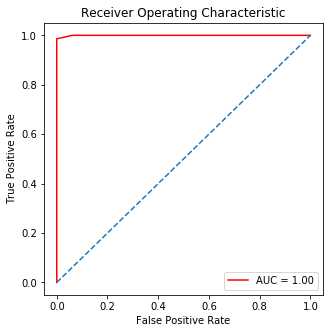

In [42]:
RF=RandomForestClassifier(max_depth=8, min_samples_split=2, n_estimators=14, random_state =3)
RF.fit(x_train,y_train)

y_pred=RF.predict(x_test)
y_proba=RF.predict_proba(x_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr, tpr, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_(fpr,tpr,roc_auc)

Accuracy: 98.08%
Random Forest TRAIN score with  1.0
Random Forest TEST score with  0.9807692307692307

[[33  0]
 [ 2 69]]


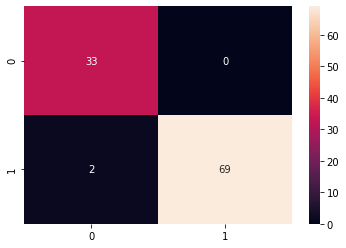

In [43]:
acc = accuracy_score(y_test, y_pred)*100
Accuracies['RF'] = acc
print("Accuracy: {:.2f}%".format(acc))
print("Random Forest TRAIN score with ",format(RF.score(x_train, y_train)))
print("Random Forest TEST score with ",format(RF.score(x_test, y_test)))
print()

co=confusion_matrix(y_test,y_pred)
print(co)
sns.heatmap(co,annot=True)
plt.show()

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.97      0.99        71

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104



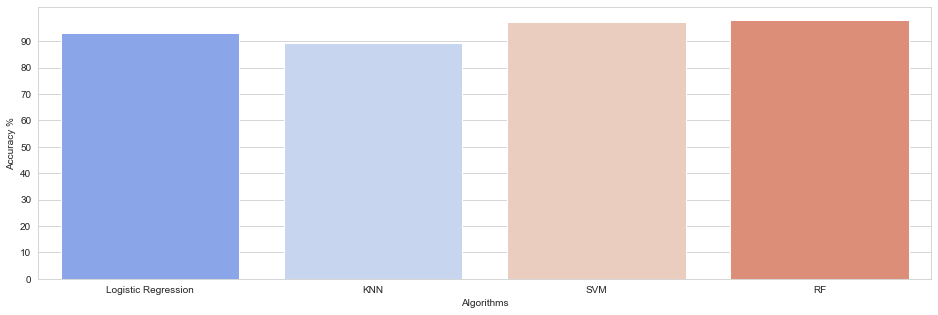

In [58]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(Accuracies.keys()), y=list(Accuracies.values()), palette='coolwarm')
plt.show()

In [59]:
import pickle

In [48]:
# save the model to disk
filename = 'RF_model_diabetes.pkl'
pickle.dump(RF, open(filename, 'wb'))

In [50]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

98.07692307692307
